# Assignment 2 - groupby, parametric and non-parametric distributions

This assignment uses the 2018 Green Taxi Trip data filtered to only include trips from Sept. 24, 2018.  Download the file from Blackboard.  The original unfiltered dataset is available at [https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i](https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i).

Note:  To convert the `lpep_pickup_datetime` column to a `datetime` object, add the parameter `parse_dates = ["lpep_pickup_datetime"]` to `read_csv()`.  
ex. `taxi = pd.read_csv("taxi.csv", parse_dates = ["lpep_pickup_datetime"])`
Unfortunately I don't know why we have to use a different method for dates here, but the one used in the Labs does not work.

All plots should have an appropriate title and axis labels.

1. What is the mean trip distance for each possible number of passengers?  For what number of passengers is the mean trip distance the longest? 
2. What is the median trip distance for each hour (0 - 23)?  For what time of day is the median trip distance longest?  Why do you think that might be?  (There is no right or wrong answer to this last question.)
3. Plot a Seaborn relplot of the relationship between trip distance and total amount paid, with the point colored by the toll amount.  What do you notice about the relationship between trip distance and total amount paid?  Is there any relationship between the amount of tolls paid and the trip distance and/or total amount paid?
4.  For this question, only consider taxi trips of 30 miles or less.  Fit an exponential distribution to the trip distance data.  What is lambda?  Plot this exponential distribution over a histogram of the trip distance data.  Do you think the exponential distribution is a good model or estimate of the actual trip distance data?
<details> <summary>Hint:</summary>
There are several steps to this question:
- create a new data only containing taxi trips 30 miles or less
- estimate lambda using the mean trip distance
- compute x and y coordinates for the exponential distribution using the estimated lambda (or just the mean directly)
- plot the exponential distribution over the histogram of the trip distances
</details>
5.  a.  Using the full taxi dataset, take 1000 samples with replacement and compute the mean trip distance of each sample.

    b.  Plot a histogram of this sampling distrbution of sample means.  What shape does it have?  

    c.  Estimate the normal distribution that fits (best matches) the sample means, and plot the histogram again with a line showing this normal distribution.  Do you think this histogram was sampled from this normal distribution?

    d.  According to the Central Limit Theorem, the sampling distribution of the sample means should be a normal distribution with mean equal to the mean of the population and standard deviation equal to the standard deviation of the population divided by the square root of the size of the samples.  Since our data set is very large, we will assume the mean and standard deviation of the population are the same as the mean and standard deviation of the sample (our taxi data).  Redraw the histogram and normal distribution from step c, adding a line for the normal distribution predicted by the Central Limit Theorem.  How close is the normal distribution predicted by the Central Limit Theorem to the normal distribution we estimated (fit) in step c?
6. a. Compute the 95% confidence interval for the mean trip distance for trips with only 1 passenger.

    b. Compute the 95% confidence interval for the mean trip distance for trips with only 2 passengers.
    
    c.  Can we conclude that the mean trip distance is different when there is 1 passenger compared to when there are 2 passengers?  Why or why not?

1. What is the mean trip distance for each possible number of passengers?  For what number of passengers is the mean trip distance the longest? 

In [90]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# load in dataset
pd.set_option("display.max_columns", None)
green_taxi = pd.read_csv("green_taxi.csv", parse_dates = ["lpep_pickup_datetime"])

In [21]:
green_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-09-24 00:00:03,09/24/2018 12:12:18 AM,N,1,83,56,2,2.38,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,1,1
1,2,2018-09-24 00:00:11,09/24/2018 12:04:28 AM,N,1,7,179,1,0.97,5.0,0.5,0.5,1.26,0.0,NaN,0.3,7.56,1,1
2,2,2018-09-24 00:00:15,09/24/2018 12:06:38 AM,N,1,260,129,1,1.21,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
3,2,2018-09-24 00:00:19,09/24/2018 12:06:18 AM,N,1,7,223,1,1.34,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2018-09-24 00:00:20,09/24/2018 12:10:45 AM,N,1,66,97,5,2.14,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1


In [32]:
green_taxi["passenger_count"].describe() # min of 0 and max of 9 

count    20687.00000
mean         1.33509
std          1.01333
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          9.00000
Name: passenger_count, dtype: float64

In [53]:
# trip distance means
trip_distance_means = []

for i in np.arange(0,10):
    passenger_filter = green_taxi["passenger_count"] == i
    trip_distance_mean = green_taxi[passenger_filter]["trip_distance"].mean()
    trip_distance_means.append(trip_distance_mean)

print("M E A N   D I S T A N C E S\n-------------------------")
for i in np.arange(0,10):
    if i != 7:
        print("%d Passengers: %.2f" % (i, trip_distance_means[i]))
    else:
        continue

M E A N   D I S T A N C E S
-------------------------
0 Passengers: 3.17
1 Passengers: 3.44
2 Passengers: 3.33
3 Passengers: 3.50
4 Passengers: 2.32
5 Passengers: 3.38
6 Passengers: 3.50
8 Passengers: 1.37
9 Passengers: 0.22


2. What is the median trip distance for each hour (0 - 23)?  For what time of day is the median trip distance longest?  Why do you think that might be?  (There is no right or wrong answer to this last question.)

In [69]:
# trip distance means
trip_distance_medians = []

for i in np.arange(0,24):
    hour_filter = green_taxi["lpep_pickup_datetime"].dt.hour == i
    trip_distance_median = green_taxi[hour_filter]["trip_distance"].median()
    trip_distance_medians.append(trip_distance_median)

print("M E D I A N   D I S T A N C E S\n------------------------------")
for i in np.arange(0,24):
        print("%d:00: %.2f" % (i, trip_distance_medians[i]))

print()

max = 0;
for i in np.arange(0,24):
    if trip_distance_medians[i] > max:
        max = i
    
print("Time of day with the longest rides: %d:00" % (max))

M E D I A N   D I S T A N C E S
------------------------------
0:00: 1.83
1:00: 1.61
2:00: 1.86
3:00: 1.80
4:00: 3.06
5:00: 4.54
6:00: 4.26
7:00: 2.44
8:00: 2.06
9:00: 2.03
10:00: 2.14
11:00: 2.08
12:00: 2.17
13:00: 2.20
14:00: 2.04
15:00: 1.88
16:00: 2.04
17:00: 1.80
18:00: 1.71
19:00: 1.60
20:00: 1.64
21:00: 1.79
22:00: 1.84
23:00: 1.95

Time of day with the longest rides: 5:00


__I think 5:00 may be the longest time of day because people who have to commute further to work would commute during this time to ensure that they get to work on time.__

3. Plot a Seaborn relplot of the relationship between trip distance and total amount paid, with the point colored by the toll amount.  What do you notice about the relationship between trip distance and total amount paid?  Is there any relationship between the amount of tolls paid and the trip distance and/or total amount paid?

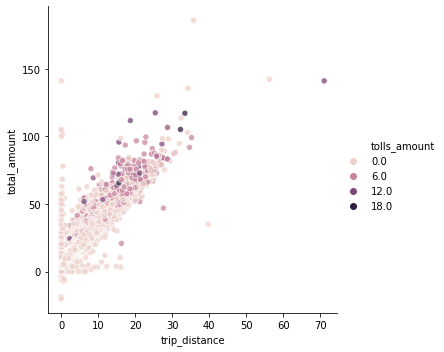

In [74]:
sns.relplot(x = "trip_distance", y = "total_amount", hue = "tolls_amount", alpha= 0.75, data = green_taxi)

__I notice that as the trip distance increases, the total amount paid also increases. They have a direct relationship__

__There is a relationship between the amount of tolls paid and the trip distance because as the trip distance increases the toll amounts also increase (color of points gets darker). There is also a relationship between the amount of tolls paid and the total amount paid because as the total amount paid increases the the toll amounts also increase (color of points gets darker).__

4.  For this question, only consider taxi trips of 30 miles or less.  Fit an exponential distribution to the trip distance data.  What is lambda?  Plot this exponential distribution over a histogram of the trip distance data.  Do you think the exponential distribution is a good model or estimate of the actual trip distance data?

In [92]:
distance_filter = green_taxi["trip_distance"] <= 30
thirty_or_less = green_taxi[distance_filter]

In [97]:
lambda_ = 1/thirty_or_less["trip_distance"].mean()
print("Lambda: %.2f" % (lambda_))

Lambda: 0.29


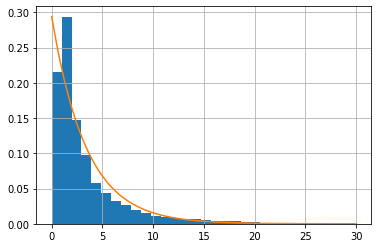

In [98]:
x = np.linspace(0,30)
y = stats.expon.pdf(x, scale = thirty_or_less["trip_distance"].mean())

thirty_or_less["trip_distance"].hist(bins = 30, density = True)
plt.plot(x,y)

__I believe that the exponential distribution is a good model/estimate of the actual trip distance data (under 30 miles or less)__

5.  a.  Using the full taxi dataset, take 1000 samples with replacement and compute the mean trip distance of each sample.

    b.  Plot a histogram of this sampling distrbution of sample means.  What shape does it have?  

    c.  Estimate the normal distribution that fits (best matches) the sample means, and plot the histogram again with a line showing this normal distribution.  Do you think this histogram was sampled from this normal distribution?
    
     d.  According to the Central Limit Theorem, the sampling distribution of the sample means should be a normal distribution with mean equal to the mean of the population and standard deviation equal to the standard deviation of the population divided by the square root of the size of the samples.  Since our data set is very large, we will assume the mean and standard deviation of the population are the same as the mean and standard deviation of the sample (our taxi data).  Redraw the histogram and normal distribution from step c, adding a line for the normal distribution predicted by the Central Limit Theorem.  How close is the normal distribution predicted by the Central Limit Theorem to the normal distribution we estimated (fit) in step c?

In [104]:
trip_distance_means = []

for i in np.arange(0,1000):
    sample = green_taxi["trip_distance"].sample(len(green_taxi), replace = True)
    sample_mean = sample.mean()
    trip_distance_means.append(sample_mean)
    
trip_distance_means = pd.Series(trip_distance_means)
true_mean = trip_distance_means.mean()
print("\"True mean\": %.2f" % (true_mean))

"True mean": 3.43


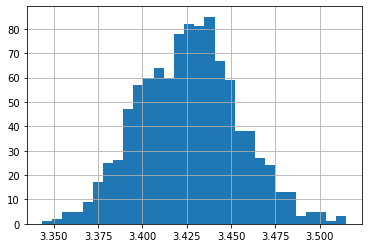

In [105]:
trip_distance_means.hist(bins = 30) # resembles a normal distribution as expected because of the Central Limit Theorem

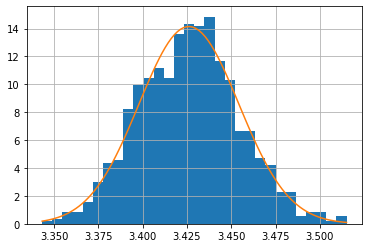

In [109]:
se = trip_distance_means.std()

x = np.linspace(trip_distance_means.min(), trip_distance_means.max(), 100)
y = stats.norm.pdf(x, loc = true_mean, scale = se)

trip_distance_means.hist(bins = 30, density = True)
plt.plot(x,y)

__I do think this histogram was sampled from a normal distribution. It resembles the normal distribution probability density function.__

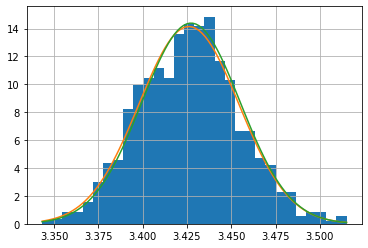

In [116]:
population_mean = green_taxi["trip_distance"].mean()
calc_se = green_taxi["trip_distance"].std()/np.sqrt(len(green_taxi))
y2 = stats.norm.pdf(x, loc = population_mean, scale = calc_se)

trip_distance_means.hist(bins = 30, density = True)
plt.plot(x,y)
plt.plot(x,y2)

__The normal distribution predicted by the Central Limit Theorem and the normal distribution estimated in the previous part are extremely close to one another.__

6. a. Compute the 95% confidence interval for the mean trip distance for trips with only 1 passenger.

    b. Compute the 95% confidence interval for the mean trip distance for trips with only 2 passengers.
    
    c.  Can we conclude that the mean trip distance is different when there is 1 passenger compared to when there are 2 passengers?  Why or why not?

In [122]:
one_pass_filter = green_taxi["passenger_count"] == 1
one_pass = green_taxi[one_pass_filter]["trip_distance"]

one_pass_means = []
for i in np.arange(0,1000):
    sample = one_pass.sample(len(one_pass), replace = True)
    sample_mean = sample.mean()
    one_pass_means.append(sample_mean)
    
one_pass_means = pd.Series(one_pass_means)
low = one_pass_means.quantile(0.025)
high = one_pass_means.quantile(0.975)
print("95%% confidence interval for the mean trip distance for trips with only 1 passenger: (%.2f, %.2f)" % (low,high))

95% confidence interval for the mean trip distance for trips with only 1 passenger: (3.38, 3.50)


In [123]:
two_pass_filter = green_taxi["passenger_count"] == 2
two_pass = green_taxi[two_pass_filter]["trip_distance"]

two_pass_means = []
for i in np.arange(0,1000):
    sample = two_pass.sample(len(two_pass), replace = True)
    sample_mean = sample.mean()
    two_pass_means.append(sample_mean)
    
two_pass_means = pd.Series(two_pass_means)
low2 = two_pass_means.quantile(0.025)
high2 = two_pass_means.quantile(0.975)
print("95%% confidence interval for the mean trip distance for trips with only 2 passengers: (%.2f, %.2f)" % (low2,high2))

95% confidence interval for the mean trip distance for trips with only 2 passengers: (3.12, 3.52)


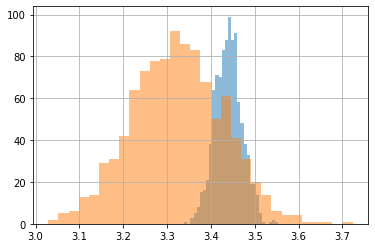

In [126]:
one_pass_means.hist(bins = 30, alpha = 0.5)
two_pass_means.hist(bins = 30, alpha = 0.5)

__We cannot conclude that the mean trip distance for trips with only 1 passenger is statistically different from the mean trip dsitance for trips with only 2 passengers because the 95% confidence intervals for both metrics overlap.__